### Wizualizacja danych

In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
my_blue="#0064B2"
my_red="#D61600"

In [77]:
dfs = pd.read_csv("filtered_std_data_gasometry.csv")

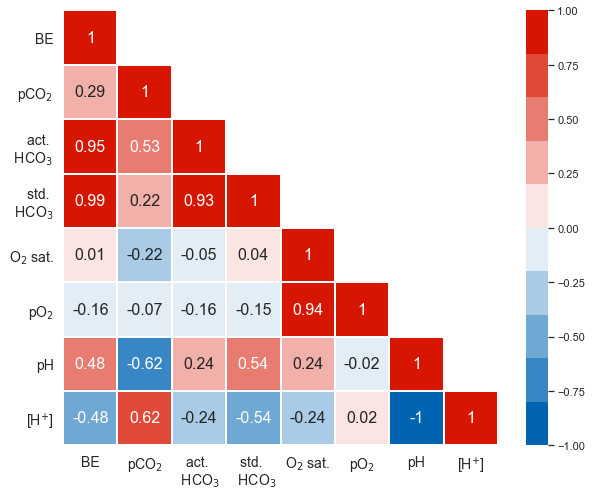

In [40]:
cmap = sns.blend_palette([my_blue, "white", my_red], n_colors=10)

df_corr=dfs[[
 'BETET',
 'CO2TET',
 'HCO3ACTE',
 'HCO3STTE',
 'O2SATTET',
 'O2TET','PHTET',
 'IONH']].corr(method='spearman')

df_corr_rounded = df_corr.round(2)
mask = np.triu(np.ones_like(df_corr, dtype=int))- np.eye(df_corr_rounded.shape[0], dtype=int).astype(bool)

fig, ax = plt.subplots(figsize=(10,8))
fig=sns.heatmap(df_corr_rounded, cmap=cmap, annot=True, mask=mask, linewidths=0.25, annot_kws=dict(size=16), square=True)
# sns.set_theme(font="Times New Roman")
ax.set_xticklabels(["BE","pCO$_2$", "act. \n HCO$_3$ ", "std. \n  HCO$_3$", "O$_2$ sat." ,"pO$_2$", "pH","[H$^\plus$]" ])
ax.set_yticklabels(["BE","pCO$_2$", "act. \n HCO$_3$ ", "std. \n  HCO$_3$", "O$_2$ sat." ,"pO$_2$", "pH","[H$^\plus$]" ])
sns.set_theme(style="whitegrid")
plt.xticks(size=14)
plt.yticks(size=14)
plt.xticks(rotation=0);
plt.savefig('korelacje_start.png', dpi=300)

In [69]:
fig = go.Figure()
cols=["BETET",	"CO2TET","HCO3ACTE","HCO3STTE",	"O2SATTET",	"O2TET", "IONH"]

for col in dfs[cols]:  # Iteracja po wszystkich kolumnach oprócz ZGON
    for zgon in dfs['ZGON'].unique():
        subset = dfs[dfs['ZGON'] == zgon]
        side = "negative" if zgon == 0 else "positive"
        color = my_blue if zgon == 0 else my_red

        fig.add_trace(go.Violin(y=subset[col], box_visible=True, name=f"{col}",
                                side=side, line_color=color, box={'visible': True}, opacity=0.8))

# Dodanie poziomej linii w y=0 i y=1
fig.update_layout(shapes=[go.layout.Shape(type='line', x0=0, x1=1, xref='paper', y0=0, y1=0, line=dict(color='black', dash='dot', width=1.5)),
                          go.layout.Shape(type='line', x0=0, x1=1, xref='paper', y0=1, y1=1, line=dict(color='black', dash='dot', width=1.5))])

# Dostosowanie rozmiaru czcionki osi x i y
fig.update_layout(xaxis=dict(tickfont=dict(size=14)), yaxis=dict(tickfont=dict(size=14)))
fig.update_layout(showlegend=False)
fig.update_layout(height=600, width=1000)
fig.show()
fig.write_image("rozklad_parametrow.png", format="png", scale=3)

In [ ]:

df_line=df6[[ "BADANIE_NR", "CO2TET","ZGON"]].copy()
df_line["ZGON"].replace({"NIE": "recovered", "TAK": "deceased"}, inplace=True)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
fig2=sns.lineplot(data=df_line, x="BADANIE_NR", y='CO2TET', hue="ZGON", ci='sd', palette={'recovered': "#6F92F2", 'deceased': "#FF6666"})

plt.xlabel('measurement number')
plt.ylabel('pCO$_2$')
plt.xlim(0,50)
plt.xticks(ticks=[1,10,20,30,40,50])
plt.legend(title="")
df_line=df6[[ "BADANIE_NR", "O2SATTET","ZGON"]].copy()
df_line["ZGON"].replace({"NIE": "recovered", "TAK": "deceased"}, inplace=True)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
fig3=sns.lineplot(data=df_line, x="BADANIE_NR", y='O2SATTET', hue="ZGON", ci='sd', palette={'recovered': "#6F92F2", 'deceased': "#FF6666"})

plt.xlabel('measurement number')
plt.ylabel('O$_2$ saturation')
plt.xlim(0,50)
plt.xticks(ticks=[1,10,20,30,40,50])
plt.legend(title="")
df_line=df6[[ "BADANIE_NR", "BETET","ZGON"]].copy()
df_line["ZGON"].replace({"NIE": "recovered", "TAK": "deceased"}, inplace=True)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
fig4=sns.lineplot(data=df_line, x="BADANIE_NR", y='BETET', hue="ZGON", ci='sd', palette={'recovered': "#6F92F2", 'deceased': "#FF6666"})

plt.xlabel('measurement number')
plt.ylabel('BE')
plt.xlim(0,50)
plt.xticks(ticks=[1,10,20,30,40,50])
plt.legend(title="")
import plotly.express as px
px.scatter(df6, x="IONH", y="PHTET", width=600)



from itertools import groupby
def rle(data):
  x = [len(list(y)) for x, y in groupby(data) if x==True]
  if x==[]:
    return 0
  return max(x)
#Obliczenie różnic
dfr=df.copy()
nr_pacjenta=dfr["PACJENT_NR"]
dfr2=dfr[yeslist].groupby('PACJENT_NR').diff()
dfr3=pd.concat([nr_pacjenta, dfr2], axis=1)
dfr_mdiff=dfr3.groupby('PACJENT_NR').mean().add_suffix('_mdiff')
#dfr_mdiff

df_mean = df[yeslist].groupby('PACJENT_NR').mean().add_suffix('_mean')
df_min = df[yeslist].groupby('PACJENT_NR').min().add_suffix('min')
df_max = df[yeslist].groupby('PACJENT_NR').max().add_suffix('max')
df_med = df[yeslist].groupby('PACJENT_NR').median().add_suffix('median')
df_size = df[['PACJENT_NR', 'BADANIE_NR']].groupby('PACJENT_NR').count().add_suffix('_size')
df_pom = df[yeslist].groupby('PACJENT_NR').std().add_suffix('_std')
df_sum = df[yeslist].groupby('PACJENT_NR').sum().add_suffix('_sum')

df_rzad_pom_ups=pd.concat([df_imp["PACJENT_NR"],df_imp[["BETET", "IONH", "O2SATTET", "CO2TET"]]>1], axis=1) #"O2TET", "HCO3STTE", "HCO3ACTE"
df_rzad_ups=df_rzad_pom_ups.groupby("PACJENT_NR").agg(rle).add_suffix('_rzad_ups')

df_rzad_pom_downs=pd.concat([df_imp["PACJENT_NR"],df_imp[["BETET", "IONH", "O2SATTET", "CO2TET"]]<0], axis=1) #"O2TET", "HCO3STTE", "HCO3ACTE"
df_rzad_downs=df_rzad_pom_downs.groupby("PACJENT_NR").agg(rle).add_suffix('_rzad_downs')

df_zgon = df_imp[['PACJENT_NR', 'ZGON']].groupby('PACJENT_NR').first()


#Zliczanie wyników za niskich
df_no_drops = df_imp.copy()
for col in yeslist:
    if col != "PACJENT_NR":
        df_no_drops[col] = np.where(df_imp[col] < 0, 1, 0) #1-za niski, 0-nie za niski

#Zliczanie wyników za wysokich
df_no_ups = df_imp.copy()
for col in yeslist:
    if col != "PACJENT_NR":
        df_no_ups[col] = np.where(df_imp[col] > 1, 1, 0) #1-za wysoki, 0-nie za wysoki

#Zliczanie wyników poza normą drop-poniżej up-powyżej
df_no_dropup = df_imp.copy()
for col in yeslist:
    if col != "PACJENT_NR": #dla innych kolumn niż numer pacjenta
        df_no_dropup[col] = df_no_ups[col] + df_no_drops[col]

#Dodanie kolumny nOK zliczającej, ile wyników pacjent miał ok
df_no_dropup["nOK"] = 0
for col in yeslist:
    if col != "PACJENT_NR":
        df_no_dropup["nOK"] += df_no_dropup[col]

#Dodanie kolumny sOK, która przyjmuje wartość 1, gdy wszystkie wyniki były ok
df_no_dropup["sOK"] = np.where(df_no_dropup["nOK"] == 0, 1, 0)

#wypisz tablicę wszystkich wyników
#print(df_no_dropup)

#agregacja
df_no_drops = df_no_drops[yeslist].groupby('PACJENT_NR').sum().add_suffix('_no_drops')
df_no_ups = df_no_ups[yeslist].groupby('PACJENT_NR').sum().add_suffix('_no_up')
df_no_dropup = df_no_dropup[["PACJENT_NR","BETET", "IONH", "O2SATTET", "CO2TET", "nOK", "sOK"]].groupby('PACJENT_NR').sum().add_suffix('_no_dropup')

#"O2TET", "HCO3STTE", "HCO3ACTE"

#łącznie
df_list = [df_size,df_zgon, df_min, df_max, df_no_drops, df_no_ups, df_no_dropup, dfr_mdiff, df_rzad_ups, df_rzad_downs]
#'df_mean, df_med, df_pom, df_sum'
df_all = pd.concat(df_list, axis=1)


#usuwanie kolumn
df_all.drop(columns=["O2SATTET_no_up", "O2SATTET_no_dropup", "O2SATTET_rzad_ups" ,  "O2SATTETmax"], inplace=True) #"O2TETmax" ,  "O2SATTETmax"

# df_all.to_csv("pacjenci_statystyki_gazometria.csv")
df_all.columns
df_all = df_all[df_all["BADANIE_NR_size"] > 6]
df_all["ZGON"].replace({0: "recovered", 1: "deceased"}, inplace=True)
df2_dead = df_all[df_all["ZGON"]=="deceased"].copy()
df2_life = df_all[df_all["ZGON"]=="recovered"].copy()

df2_dead.drop(columns=["ZGON"], inplace=True)
df2_life.drop(columns=["ZGON"], inplace=True)
df2_dead.columns
# plt.figure(figsize=(10,5))

# fig = sns.barplot(y=df2_dead["BADANIE_NR_size"], x=df2_dead.index, color="red",
#                    label='deceased')

#metoda Manna-Whitneya
tabela_MN=pd.DataFrame(columns=("nazwa", "statystyka", "p-wartosc"))
for column in df2_dead.columns:
    kw = stats.mannwhitneyu(df2_dead[column], df2_life[column])
    new_row = {"nazwa": column, "statystyka": kw[0], "p-wartosc": kw[1]}
    tabela_MN = pd.concat([tabela_MN, pd.DataFrame([new_row])], ignore_index=True)
nazwy_sign=tabela_MN[tabela_MN["p-wartosc"]<0.05].nazwa
tabela_MN.to_csv("tabela_MN.csv")
len(nazwy_sign)
#korelacje zmiennych znaczących
# zmienne_sign=df_all[nazwy_sign]
# cmap = sns.diverging_palette(240, 10, as_cmap=True)
# zmienne_sign_corr=zmienne_sign.corr()
# sns.heatmap(zmienne_sign.corr(), cmap=cmap)
# tab_corr=zmienne_sign_corr.unstack().to_frame().reset_index()
# tab_corr.columns=["Zmienna 1", "Zmienna 2", "Wartość"]
# tab_corr.to_csv("lista_korelacji.csv")
# zmienne_sign_corr.to_csv("tabela_korelcji.csv")
# zmienne_sign_corr
# #drzewo decyzyjne bez kroswalidacji
# X=df_all[nazwy_sign]
# y=df_all["ZGON"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
# model = tree.DecisionTreeClassifier(random_state=5, max_depth=3)
# model = model.fit(X_train, y_train)
# y_pred=model.predict(X_test)
# acc=accuracy_score(y_test, y_pred)
# print("Dokładność drzewa: ", acc)
# #confusion = confusion_matrix(y_test, y_pred)
#dummy classifier
X=df_all[nazwy_sign]
y=df_all["ZGON"]

model=DummyClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=18) #5

s=list()
stren=list()
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  model.fit(X.iloc[train_index], y.iloc[train_index])
  s.append(np.round(model.score(X.iloc[test_index], y.iloc[test_index]),4))

print("Wyniki kroswalidacji: ", s)
print("Dokładność drzewa: ", np.mean(s))
#drzewo decyzyjne z walidacją krzyżową i zbalansowaniem klas przy podziale na treningowe i testowe
X=df_all[nazwy_sign]
y=df_all["ZGON"]
model = tree.DecisionTreeClassifier(random_state=5, max_depth=3)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=18) #5

s=list()
stren=list()
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  model.fit(X.iloc[train_index], y.iloc[train_index])
  s.append(np.round(model.score(X.iloc[test_index], y.iloc[test_index]),4))
  stren.append(np.round(model.score(X.iloc[train_index], y.iloc[train_index]),4))
  # confusion = confusion_matrix(y.iloc[test_index], model.predict(X.iloc[test_index]))
  #print(confusion)


print("Wyniki uczenia: ", stren)
print("Dokładność uczenia: ", np.mean(stren))
print()
print("Wyniki kroswalidacji: ", s)
print("Dokładność drzewa: ", np.mean(s))
model.fit(X, y)
wartosci=model.feature_importances_
print(X.columns)
kategorie=['minimum BETET \n measurement', 'minimum [H$^\plus$] \n (maximum pH)', 'maximum [H$^\plus$] (minimum pH)', 'maximum pCO$_2$', 'BETET below the norm [number of cases]',
           '[H$^\plus$] below the norm \n (pH above the norm [number of cases])', 'pO$_2$ saturation below the norm \n [number of cases]', 'pCO$_2$ below the norm [number of cases]',
           'BETET above the norm [number of cases]',
           '[H$^\plus$] above the norm \n (pH below the norm) \n [number of cases]', 'average change in \n ion H concentration', 'average change in \n O$_2$ saturation', 'average change in pCO$_2$',
           'BETET above the norm [number of cases in a row]', '[H$^\plus$] above the norm \n (pH below the norm) \n [number of cases in a row]', 'BETET below the norm [number of cases in a row]',
           '[H$^\plus$] below the norm \n (pH above the norm) \n [number of cases in a row]', 'O$_2$ saturation above the norm \n [number of cases in a row]']
# kategorie=X.columns


# Tworzenie wykresu słupkowego
niezerowe_wartosci = [x for x in wartosci if x != 0]
niezerowe_kategorie = [kategorie[i] for i, x in enumerate(wartosci) if x != 0]

#sortowanie
sorted_niezerowe_wartosci, sorted_niezerowe_kategorie = zip(*sorted(zip(niezerowe_wartosci, niezerowe_kategorie), reverse=False))

# Tworzenie wykresu słupkowego z niezerowymi wartościami
fig, ax = plt.subplots(figsize=(7,5))
plt.barh(sorted_niezerowe_kategorie, sorted_niezerowe_wartosci)

plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
ax.yaxis.set_label_coords(-0.5, 0.5)
plt.show()
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=[ "ZGON - TAK","ZGON - NIE"],
                           filled=False, rounded=True)

graph = graphviz.Source(dot_data)

# Zapisz obrazek do pliku PNG
# graph.format = 'png'
# graph.render('drzewo_gazometria_cale_dane')
graph

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
  model.fit(X.iloc[train_index], y.iloc[train_index])
  dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=["ZGON - NIE", "ZGON - TAK"],
                           filled=False, rounded=True)
  graph = graphviz.Source(dot_data)
  graph.format = 'png'
  graph.render(f'drzewo_gazometria_{i}')


#srednia wynikow min i max
yeslist = ["PACJENT_NR","BETET", "IONH", "O2SATTET",  "CO2TET", "HCO3STTE", "HCO3ACTE", "O2TET", "PHTET"]
df_min2 = df6[yeslist].groupby('PACJENT_NR').min().add_suffix('min')
df_max2 = df6[yeslist].groupby('PACJENT_NR').max().add_suffix('max')

df_list2 = [df_zgon, df_size, df_min2, df_max2 ]
df_min_max = pd.concat(df_list2, axis=1)

#df_min_max['PHmin'] = -np.log10(df_min_max['IONHmin'])
#df_min_max['PHmax'] = -np.log10(df_min_max['IONHmax'])

df_min_max.head()

srednie = df_min_max.groupby('ZGON').mean()
print(srednie)
# df_size = df0[['PACJENT_NR', 'BADANIE_NR']].groupby('PACJENT_NR').count().add_suffix('_size')
# pacjenci_wiecej_niz_6_badan = df_size[df_size['BADANIE_NR_size'] > 6].index

# df_filtered = df0[df0['PACJENT_NR'].isin(pacjenci_wiecej_niz_6_badan)]
# df_filtered1 = df_filtered[df_filtered['BADANIE_NR'] == 1]
# df_filtered1["ZGON"] = np.where(df_filtered1["ZGON"] == "NIE", 0, 1)
# df_filtered1.head()

# df_mean_1 = df_filtered1[yeslist].groupby('ZGON').mean().add_suffix('_mean')
# print(df_mean_1)
